# Upload All Data

In [22]:
#user defined module
import load_data
import clean_text
from importlib import reload
#standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
#Sk-learn functions
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
#Utility
from collections import Counter
#NLTK
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize
#tensorflow
#from __future__ import absolute_import, division, print_function
import time
import tensorflow as tf
np.random.seed(77)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/daniellampert/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/daniellampert/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Upload data for train, early bird, and test with load_data module

In [11]:
reload(load_data)
path_to_train = 'pan_bot_id/pan19-author-profiling-training-2019-02-18/en/'
train_data = load_data.read_all_data(path_to_train)

/Users/daniellampert/Desktop/w266/bot_id_pan/bot_id_pan/load_data.py:29: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  labels = pd.read_csv(path_to_text, delimiter = "\:::",header = None)


In [12]:
path_to_early_bird = 'pan_bot_id/pan19-author-profiling-earlybirds-20190320/en/'
early_bird_data = load_data.read_all_data(path_to_early_bird)

In [13]:
path_to_test = 'pan_bot_id/pan19-author-profiling-test-2019-04-29/en/'
test_data = load_data.read_all_data(path_to_test)

In [14]:
train_data.head()


,tweet_id,tweets,bot
0,867be96f95dfc4e24541d19c6a5ab8bf,Alex is too nice for love island :(,human
1,867be96f95dfc4e24541d19c6a5ab8bf,RT @STVNews: Teenager charged with rape of wom...,human
2,867be96f95dfc4e24541d19c6a5ab8bf,@LipsTaco @jennyhastie,human
3,867be96f95dfc4e24541d19c6a5ab8bf,@RyanDunbar8 happy bday Ryan have the best day...,human
4,867be96f95dfc4e24541d19c6a5ab8bf,@jennyhastie @bootywhispers I just wanna let j...,human


In [15]:
early_bird_data.head()

,tweet_id,tweets,bot
0,5ac1aafe060f39f2dc5ae45d14656630,RT @africanstudies: Book launch today for @Mag...,human
1,5ac1aafe060f39f2dc5ae45d14656630,RT @seam_project: Join the #MethodsMatter conv...,human
2,5ac1aafe060f39f2dc5ae45d14656630,These are the kind of University meetings that...,human
3,5ac1aafe060f39f2dc5ae45d14656630,In my office and on sale now (also with cheape...,human
4,5ac1aafe060f39f2dc5ae45d14656630,Such a pity I am not free tomorrow. But if you...,human


## EDA and Pre-Process Data for Baseline

In [16]:
words = []
for string in train_data['tweets']:
    split = string.split()
split
# for i in range(0, len(split), 1):
#     words.append(" ".join(split[i:i+1]))
# train_

['@cyberrboi',
 '@ShowDemCamp',
 '@MosJollof',
 '@MNLNDBlockParty',
 'If',
 'you',
 'leave',
 'In',
 'max',
 '2',
 'hours,',
 "you'd",
 'be',
 'here',
 'just',
 'in',
 'time',
 '😊']

In [17]:
def most_common_word_plot(corpus, title, num_words, name):
    "Plots most common words in corpurs"
    words = []
    for string in corpus:
        split = string.split()
        for i in range(0, len(split), 1):
            words.append(" ".join(split[i:i+1]))

    most_occur =  Counter(words).most_common(100) 
      
    custom_stopwords = [ 'a', 'of', 'be', "i'm", "i've"]
    custom_stopwords.extend(stopwords.words('english'))
    most_occur_cleaned = []
    for i in most_occur:
        if i[0].lower() not in custom_stopwords:
            most_occur_cleaned.append(i)
  # only include top num_words:
    most_occur_cleaned = most_occur_cleaned[:num_words]
    labels, values = zip(*most_occur_cleaned)
    indexes = np.arange(len(labels))
    plt.figure(figsize=(12, 6), dpi=80)
    bar_width = 0.35
    plt.xticks(rotation=40)
    plt.bar(indexes, values)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Number of Occurences')
  # add labels
    plt.xticks(indexes, labels)
    plt.savefig(name + '.jpg')
    plt.show()

In [35]:
messy_list = ["a", 2, 3, 1, False, [1, 2, 3]] 

cleaned = [item for item in messy_list if not isinstance(item,list)]

print(cleaned)

['a', 2, 3, 1, False]


In [55]:
stop_words = stopwords.words('english')
stop_words.extend([':', ',', '(', ')', '-', '/', '?', "!"])
def tokenize_tweet(tweet):
    "Tokenizes a tweet"
    word_tokens = word_tokenize(tweet) 
    filtered_sentence = [w for w in word_tokens if not w in stop_words] 
    filtered_sentence = [] 
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w)
    return filtered_sentence
a = [tokenize_tweet(tweet) for tweet in train_data['tweets'][1:5]]

In [56]:
def most_common_word_plot(corpus, title, num_words, name):
    "Plots most common words in corpurs"
    all_words = []
    for tweet in corpus:
        tokens = tokenize_tweet(tweet)
        for token in tokens:
            all_words.append(token)
    most_occur =  Counter(all_words).most_common(100) 
  # only include top num_words:
    most_occur = most_occur[:num_words]
    labels, values = zip(*most_occur)
    print(labels, values)
    indexes = np.arange(len(labels))
    plt.figure(figsize=(12, 6), dpi=80)
    bar_width = 0.35
    plt.xticks(rotation=40)
    plt.bar(indexes, values)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Number of Occurences')
  # add labels
    plt.xticks(indexes, labels)
    plt.savefig(name + '.jpg')
    plt.show()

### Most common words in training data

In [57]:
datas = [train_data, test_data, early_bird_data]
all_data = pd.concat(datas)

('@', 'https', '.', '#', 'RT', 'I', 'http', "'s", '’', 'The') (432575, 373648, 356485, 297443, 146332, 124224, 97006, 70849, 62479, 54660)


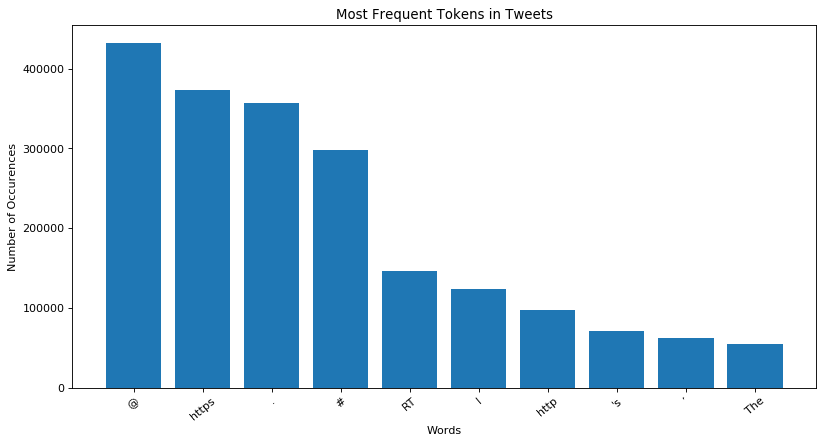

In [58]:
most_common_word_plot(all_data['tweets'], 'Most Frequent Tokens in Tweets', 10, "all_train_extra_correct_right")

('https', '#', '.', 'http', '@', '–', 'I', 'The', "'s", ';') (226209, 170237, 168683, 82643, 61357, 48232, 39695, 33977, 31622, 29939)


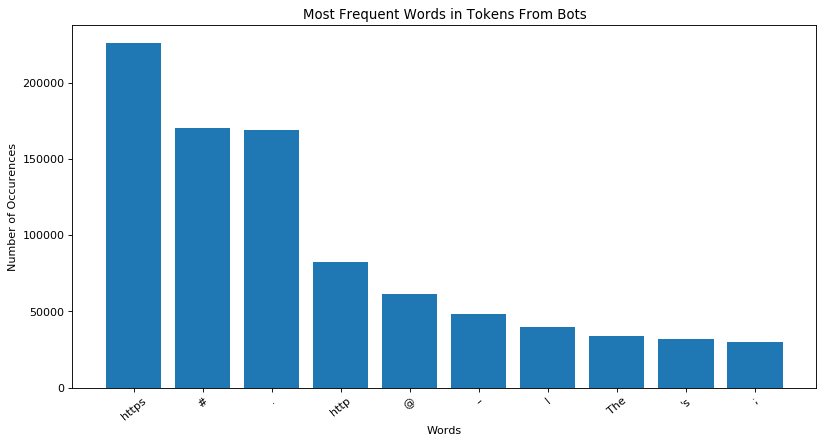

In [59]:
just_bots = all_data[all_data['bot'] == 'bot']
most_common_word_plot(just_bots['tweets'], 'Most Frequent Words in Tokens From Bots', 10, 'justbots_graph_extra_right')

('@', '.', 'https', '#', 'RT', 'I', '’', "'s", '...', 'The') (216712, 111514, 83982, 73651, 73434, 50900, 27791, 23025, 13808, 12292)


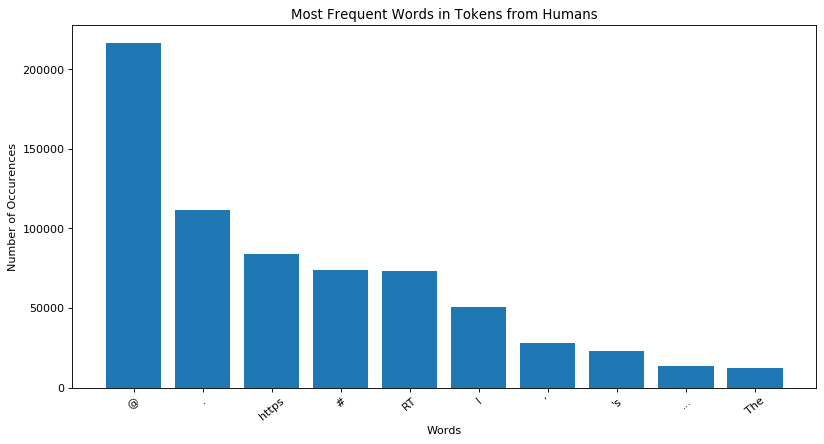

In [60]:
just_humans = train_data[train_data['bot'] == 'human']
most_common_word_plot(just_humans['tweets'], 'Most Frequent Words in Tokens from Humans', 10, 'justhumans_graph_extra_right')

#### The fourth entry is an emoji and the 5th is a suspicious link

In [69]:
reload(clean_text)

<module 'clean_text' from '/Users/daniellampert/Desktop/w266/bot_id_pan/bot_id_pan/clean_text.py'>

In [70]:
train_data_base = clean_text.clean_text(train_data)
earlybird_data_base = clean_text.clean_text(early_bird_data)
test_data_base = clean_text.clean_text(test_data)

In [71]:
train_data_base.head()

,tweet_id,tweets,bot
0,867be96f95dfc4e24541d19c6a5ab8bf,"['alex', 'is', 'too', 'nice', 'for', 'love', '...",human
1,867be96f95dfc4e24541d19c6a5ab8bf,"['rt', '@', 'stvnews', ':', 'teenager', 'charg...",human
2,867be96f95dfc4e24541d19c6a5ab8bf,"['@', 'lipstaco', '@', 'jennyhastie']",human
3,867be96f95dfc4e24541d19c6a5ab8bf,"['@', 'ryandunbar8', 'happy', 'bday', 'ryan', ...",human
4,867be96f95dfc4e24541d19c6a5ab8bf,"['@', 'jennyhastie', '@', 'bootywhispers', 'i'...",human


## Split train data into train and development set and add full corpus

In [72]:
frames = [train_data_base, earlybird_data_base, test_data_base]
corpus = pd.concat(frames)
y_train_base = train_data['bot']
X_train_base = train_data['tweets']
y_early_bird_base = early_bird_data['bot']
X_earlybird_base = early_bird_data['tweets']
y_test_base = test_data['bot']
X_test_base = test_data['tweets']
X_train_base, X_dev_base, y_train_base, y_dev_base = train_test_split(X_train_base, y_train_base, test_size = 0.33, random_state = 37)

## Fit baseline model

In [73]:
#issue with shapes
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(corpus['tweets'])
tfidf_train_X = Tfidf_vect.transform(X_train_base)
tfidf_dev_X = Tfidf_vect.transform(X_dev_base)

In [74]:
tfidf_earlybirdX = Tfidf_vect.transform(X_earlybird_base)
tfidf_testX = Tfidf_vect.transform(X_test_base)

In [75]:
print(tfidf_earlybirdX.shape, y_early_bird_base.shape, tfidf_testX.shape, y_test_base.shape)

(26400, 5000) (26400,) (264000, 5000) (264000,)


In [79]:
start = time.time()
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train_X, y_train_base)
predictions_SVM = SVM.predict(tfidf_dev_X)
accuracy_score(predictions_SVM, y_dev_base)*100
stop = time.time()
print(stop-start)

9700.395761966705


In [80]:
accuracy_score(predictions_SVM, y_dev_base)

0.8588114151220947

In [81]:
predictions_svm_earlybird = SVM.predict(tfidf_earlybirdX)
print(f'The accuracy on the earlybird set is {accuracy_score(predictions_svm_earlybird, y_early_bird_base)}')

The accuracy on the earlybird set is 0.7776136363636363


In [82]:
predictions_svm_test = SVM.predict(tfidf_testX)
print(f'The accuracy on the test set is {accuracy_score(predictions_svm_test, y_test_base)}')

The accuracy on the test set is 0.7546856060606061
